In [2]:

# Importing Libraries
import ast
import seaborn as sns
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Loading Data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_da_sg = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Singapore')].copy()

In [4]:
df_da_sg = df_da_sg.dropna(subset= ['salary_year_avg'])

df_da_sg_explode = df_da_sg.explode('job_skills')

df_da_sg_explode[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
3457,100500.0,python
3457,100500.0,sql
3457,100500.0,numpy
3457,100500.0,pandas
3457,100500.0,zoom


In [5]:
df_da_skills = df_da_sg_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

da_job_skills = len(df_da_sg)

df_da_skills['skill_percent'] = df_da_skills['skill_count'] / da_job_skills * 100

skill_percent = 5 

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]

df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,16,98500.0,57.142857
python,12,102750.0,42.857143
tableau,9,100500.0,32.142857
excel,8,100500.0,28.571429
r,6,99500.0,21.428571
aws,5,100500.0,17.857143
spark,5,149653.0,17.857143
power bi,4,90000.0,14.285714
hadoop,3,75000.0,10.714286


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


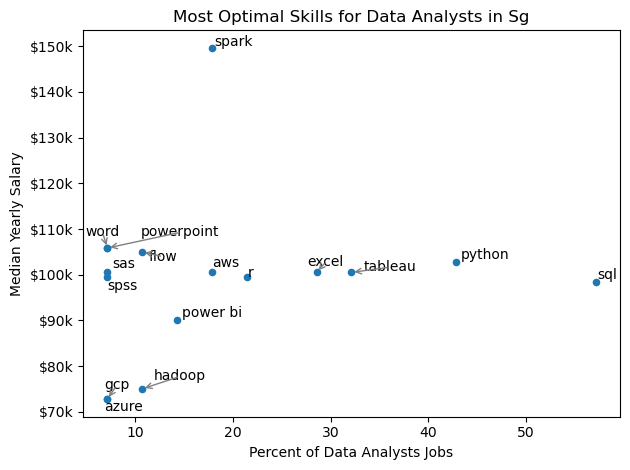

In [6]:
from adjustText import adjust_text

df_da_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Collect text objects
texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], 
                          df_da_skills_high_demand['median_salary'].iloc[i], 
                          txt))

# Adjust text positions to minimize overlap
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='->', color='gray'),
    expand_text=(1.2, 1.4),  # Adjust text distances
    expand_points=(1.2, 1.4),  # Adjust point distances
    force_text=0.5,  # Fine-tune the force applied to text
    force_points=0.3  # Fine-tune the force applied to points
)

plt.xlabel('Percent of Data Analysts Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Sg')

# Format y-axis labels
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.tight_layout()
plt.show()


In [7]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [8]:
df_techroles = df['job_type_skills'].copy()

df_techroles = df_techroles.drop_duplicates()

df_techroles = df_techroles.dropna()

techroles_dict = {}
for row in df_techroles:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in techroles_dict:
            techroles_dict[key] += value
        else:
            techroles_dict[key] = value

for key, value in techroles_dict.items():
    techroles_dict[key] = list(set(value))

techroles_dict

{'analyst_tools': ['dax',
  'word',
  'ms access',
  'msaccess',
  'datarobot',
  'ssrs',
  'microstrategy',
  'looker',
  'alteryx',
  'spss',
  'qlik',
  'esquisse',
  'splunk',
  'powerpoint',
  'nuix',
  'tableau',
  'excel',
  'sharepoint',
  'sas',
  'ssis',
  'spreadsheet',
  'power bi',
  'sap',
  'powerbi',
  'sheets',
  'cognos',
  'outlook',
  'visio'],
 'programming': ['bash',
  'matlab',
  'scala',
  'mongo',
  'perl',
  'swift',
  'rust',
  'powershell',
  'html',
  'vb.net',
  'crystal',
  'objective-c',
  'r',
  'c',
  'pascal',
  'kotlin',
  'visualbasic',
  'php',
  'typescript',
  'apl',
  'no-sql',
  'golang',
  'assembly',
  'haskell',
  'lisp',
  'python',
  'shell',
  'julia',
  'javascript',
  'sql',
  'dart',
  'c++',
  'cobol',
  'mongodb',
  'java',
  'sas',
  't-sql',
  'css',
  'sass',
  'elixir',
  'f#',
  'groovy',
  'clojure',
  'fortran',
  'vba',
  'ruby',
  'erlang',
  'nosql',
  'solidity',
  'ocaml',
  'visual basic',
  'go',
  'delphi',
  'c#',
  '

In [9]:
df_techroles = pd.DataFrame(list(techroles_dict.items()), columns=['technology', 'skills'])

df_techroles = df_techroles.explode('skills')

df_techroles

,technology,skills
0,analyst_tools,dax
0,analyst_tools,word
0,analyst_tools,ms access
0,analyst_tools,msaccess
0,analyst_tools,datarobot
...,...,...
9,sync,zoom
9,sync,unify
9,sync,webex
9,sync,ringcentral


In [10]:
df_plot = df_da_skills_high_demand.merge(df_techroles, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,16,98500.0,57.142857,programming,sql
1,12,102750.0,42.857143,programming,python
2,9,100500.0,32.142857,analyst_tools,tableau
3,8,100500.0,28.571429,analyst_tools,excel
4,6,99500.0,21.428571,programming,r
5,5,100500.0,17.857143,cloud,aws
6,5,149653.0,17.857143,libraries,spark
7,4,90000.0,14.285714,analyst_tools,power bi
8,3,75000.0,10.714286,libraries,hadoop
9,3,105000.0,10.714286,other,flow


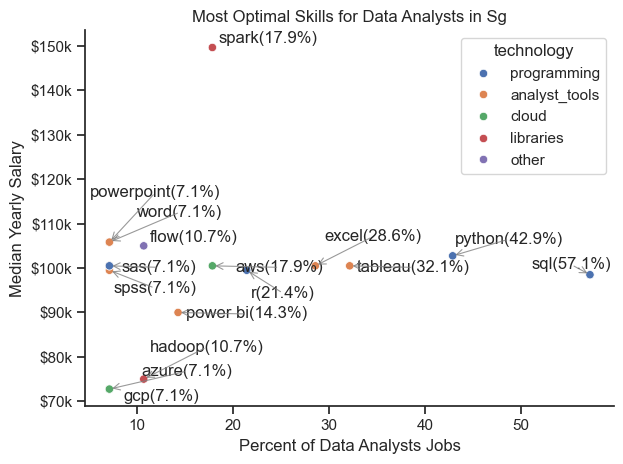

In [15]:
# Plot the scatter plot
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')

sns.despine()
sns.set_theme(style='ticks')

# Collect text objects
texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    percentage = df_da_skills_high_demand['skill_percent'].iloc[i]
    texts.append(
        plt.text(
            df_da_skills_high_demand['skill_percent'].iloc[i], 
            df_da_skills_high_demand['median_salary'].iloc[i], 
            f"{txt}({percentage:.1f}%)"
        )
    )

# Adjust text positions to minimize overlap
# Adjust text positions to minimize overlap
adjust_text(
    texts,
    arrowprops=dict(
        arrowstyle='->', color='gray', lw=0.8, alpha=0.8
    ),  # Make arrows thinner and less prominent
    expand_text=(1.5, 2.0),  # Increase spacing around the text
    expand_points=(1.5, 2.0),  # Increase spacing around the points
    force_text=2.0,  # Apply stronger force to separate text
    force_points=1.5,  # Apply stronger force to separate points
    lim=200,  # Allow more iterations for better optimization
    only_move={'text': 'y', 'points': 'y'},  # Restrict movement to the y-axis
)

# Optional: Reduce text font size for less clutter
for text in texts:
    text.set_fontsize(12)

# Add axis labels and title
plt.xlabel('Percent of Data Analysts Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Sg')

# Format y-axis labels as salary in $k
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y / 1000)}k'))

plt.tight_layout()
plt.show()
